# Functions and Function Spaces

!!! note 
    This notebook currently gives an introduction into functions, but will be
    extended to other concepts like function spaces in the near future.

Operator learning is motivated by the fact that many problems in science and
engineering are formulated in terms of functions.
While conventional neural networks learn between vector-spaces, neural operators
learn mappings between infinite-dimensional function spaces.

This notebook gives an introduction into functions, function spaces (or function sets),
and how these concepts are implemented in Continuity.


In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import matplotlib.pyplot as plt

## Functions

A function is a mapping between a set $X$ (domain) and a set $Y$ (co-domain),
denoted by

\begin{align*}
f: X &\rightarrow Y, \\
x &\mapsto f(x).
\end{align*}


For example, the function $f(x)=x^2$ maps each element $x\in X = [-1,1] \subset \mathbb{R}$ to an element of $Y = [0,1] \subset \mathbb{R}$.

In Continuity, functions are handled by a `Function` object that takes a callable as input.
As an example, we define two functions $f$ and $g$: 

$$
f(x) = \sin(\pi x), \qquad g(x) = x^3, \qquad x\in \mathbb{R}.
$$

In [13]:
import torch
from continuity.data.function import Function

f = Function(lambda x: torch.sin(torch.pi * x))
g = Function(lambda x: x ** 3)

Functions are evaluated by calling them.

In [14]:
x = torch.linspace(-1, 1, 100)
y = f(x)
z = g(x)

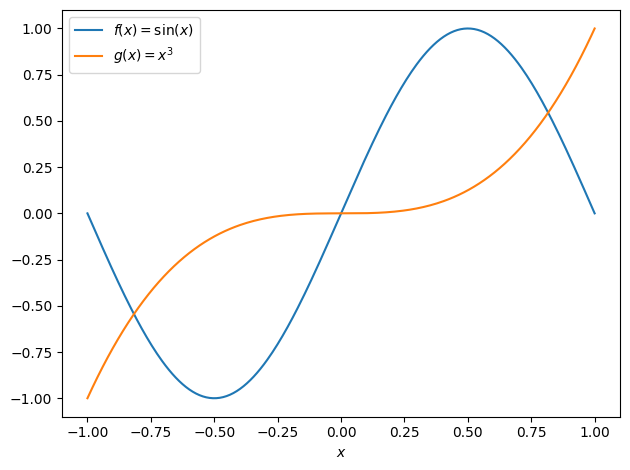

In [15]:
x_plot = torch.linspace(-1, 1, 300)
plt.plot(x_plot, f(x_plot), label="$f(x)=\sin(x)$")
plt.plot(x_plot, g(x_plot), label="$g(x)=x^3$")
plt.xlabel("$x$")
plt.legend()
plt.tight_layout()

Functions can be added to, subtracted from, multiplied with, and divided by other functions.
For instance:

In [16]:
h_1 = f + g
h_2 = f * g

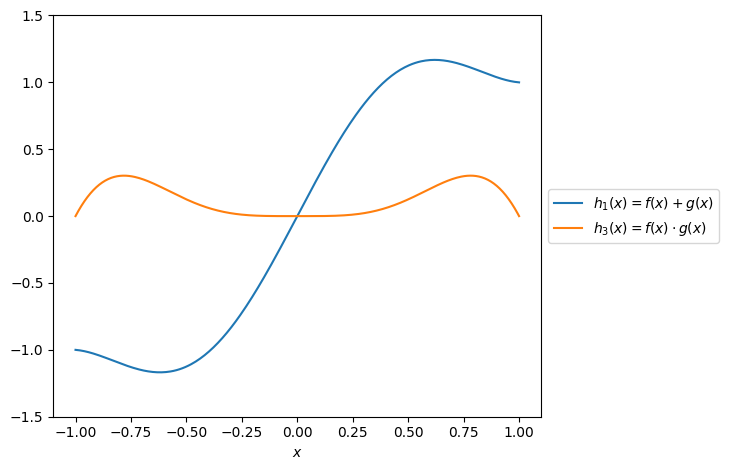

In [17]:
fig, ax = plt.subplots()
ax.plot(x_plot, h_1(x_plot), label="$h_1(x)=f(x)+g(x)$")
ax.plot(x_plot, h_2(x_plot), label="$h_2(x)=f(x)\cdot g(x)$")
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("$x$")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()